<a href="https://colab.research.google.com/github/Kallukalluzzz/DL-Lab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras

DATASET LOADING

In [2]:
mnistDB = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnistDB.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

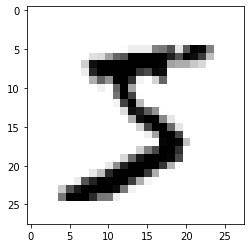

In [7]:
plt.imshow(X_train[0],cmap='binary')

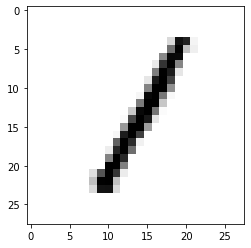

In [8]:
plt.imshow(X_train[55000],cmap='binary')

convert to 1 channel

In [9]:
X_train=X_train.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

NORMALIZE DATA(X_train & X_Test

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
cnn_MNIST = keras.models.Sequential()


In [14]:
cnn_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=X_train.shape[1:]))

In [15]:
cnn_MNIST.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [16]:
cnn_MNIST.add(keras.layers.MaxPooling2D((2,2)))

In [17]:
cnn_MNIST.add(keras.layers.Dropout(0.25))

In [18]:
cnn_MNIST.add(keras.layers.Flatten())

In [19]:
cnn_MNIST.add(keras.layers.Dense(128,activation="relu"))

In [20]:
cnn_MNIST.add(keras.layers.Dropout(0.25))

In [21]:
cnn_MNIST.add(keras.layers.Dense(10,activation="softmax"))

In [22]:
cnn_MNIST.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [23]:
import tensorflow as tf
#opt = tf.keras.optimizers.Adam(0.1)
cnn_MNIST.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history = cnn_MNIST.fit(X_train,y_train,validation_split=0.2,epochs=5,batch_size=5000)

Epoch 1/5
10/10 [==============================] - 4s 382ms/step - loss: 0.0518 - accuracy: 0.9850 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 2/5
10/10 [==============================] - 2s 201ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 3/5
10/10 [==============================] - 2s 201ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 4/5
10/10 [==============================] - 2s 201ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 5/5
10/10 [==============================] - 2s 201ms/step - loss: 0.0383 - accuracy: 0.9887 - val_loss: 0.0331 - val_accuracy: 0.9897


In [32]:
test_loss,test_accuracy=cnn_MNIST.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9876


In [33]:
print(test_loss,test_accuracy)

0.034396979957818985 0.9876000285148621


In [36]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.9 MB/s 


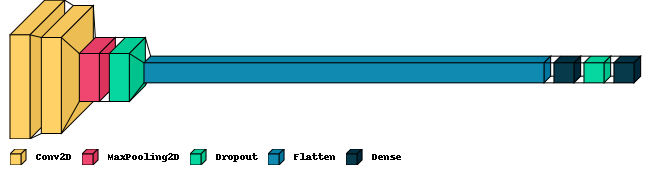

In [38]:
import visualkeras
visualkeras.layered_view(cnn_MNIST,legend=True)

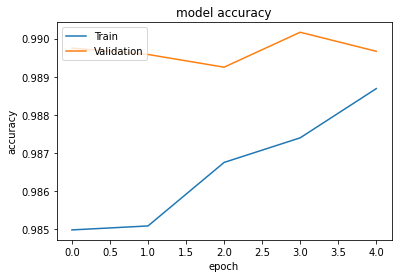

In [34]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

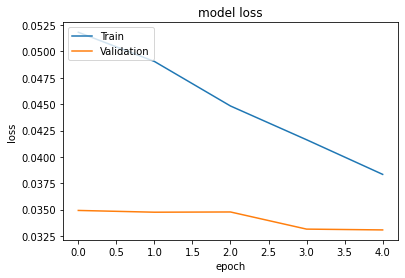

In [35]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()